# Forecasting for AK00100001_06MCD10K 


# AK00100001_06MCD10K Data Analysis Using SARIMA prediction and forecast  

In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load datasets
df = pd.read_csv('AK00100001_06MCD10K.csv')


In [3]:
print(len(df))
print(df.head())

959
  accountnumber productcode  rate  surveydate  \
0    AK00100001    06MCD10K  4.86  10/27/1999   
1    AK00100001    06MCD10K  4.86   11/3/1999   
2    AK00100001    06MCD10K  4.86  11/10/1999   
3    AK00100001    06MCD10K  4.76  11/17/1999   
4    AK00100001    06MCD10K  4.86  12/15/1999   

                                  INST_NM branchType  
0  Wells Fargo Bank, National Association        A12  
1  Wells Fargo Bank, National Association        A12  
2  Wells Fargo Bank, National Association        A12  
3  Wells Fargo Bank, National Association        A12  
4  Wells Fargo Bank, National Association        A12  


In [4]:
df['surveydate']=pd.to_datetime(df['surveydate'])

In [5]:
df

,accountnumber,productcode,rate,surveydate,INST_NM,branchType
0,AK00100001,06MCD10K,4.86,1999-10-27,"Wells Fargo Bank, National Association",A12
1,AK00100001,06MCD10K,4.86,1999-11-03,"Wells Fargo Bank, National Association",A12
2,AK00100001,06MCD10K,4.86,1999-11-10,"Wells Fargo Bank, National Association",A12
3,AK00100001,06MCD10K,4.76,1999-11-17,"Wells Fargo Bank, National Association",A12
4,AK00100001,06MCD10K,4.86,1999-12-15,"Wells Fargo Bank, National Association",A12
5,AK00100001,06MCD10K,4.86,1999-12-22,"Wells Fargo Bank, National Association",A12
6,AK00100001,06MCD10K,4.86,1999-12-29,"Wells Fargo Bank, National Association",A12
7,AK00100001,06MCD10K,4.86,2000-01-05,"Wells Fargo Bank, National Association",A12
8,AK00100001,06MCD10K,4.86,2000-01-12,"Wells Fargo Bank, National Association",A12
9,AK00100001,06MCD10K,4.86,2000-01-19,"Wells Fargo Bank, National Association",A12


In [6]:
df.set_index('surveydate',inplace=True)

In [7]:
df=df.asfreq('W-WED')

In [8]:
df

,accountnumber,productcode,rate,INST_NM,branchType
surveydate,,,,,
1999-10-27,AK00100001,06MCD10K,4.86,"Wells Fargo Bank, National Association",A12
1999-11-03,AK00100001,06MCD10K,4.86,"Wells Fargo Bank, National Association",A12
1999-11-10,AK00100001,06MCD10K,4.86,"Wells Fargo Bank, National Association",A12
1999-11-17,AK00100001,06MCD10K,4.76,"Wells Fargo Bank, National Association",A12
1999-11-24,NaN,NaN,NaN,NaN,NaN
1999-12-01,NaN,NaN,NaN,NaN,NaN
1999-12-08,NaN,NaN,NaN,NaN,NaN
1999-12-15,AK00100001,06MCD10K,4.86,"Wells Fargo Bank, National Association",A12
1999-12-22,AK00100001,06MCD10K,4.86,"Wells Fargo Bank, National Association",A12


In [9]:
df=df.fillna(method = 'ffill', axis = 0) # fill the 8 NaN value with forwarding values 

In [10]:
df=df.drop(columns=['accountnumber','productcode','INST_NM','branchType'])

In [11]:
df

,rate
surveydate,
1999-10-27,4.86
1999-11-03,4.86
1999-11-10,4.86
1999-11-17,4.76
1999-11-24,4.76
1999-12-01,4.76
1999-12-08,4.76
1999-12-15,4.86
1999-12-22,4.86


In [12]:
df.index
             

DatetimeIndex(['1999-10-27', '1999-11-03', '1999-11-10', '1999-11-17',
               '1999-11-24', '1999-12-01', '1999-12-08', '1999-12-15',
               '1999-12-22', '1999-12-29',
               ...
               '2018-02-28', '2018-03-07', '2018-03-14', '2018-03-21',
               '2018-03-28', '2018-04-04', '2018-04-11', '2018-04-18',
               '2018-04-25', '2018-05-02'],
              dtype='datetime64[ns]', name='surveydate', length=967, freq='W-WED')

So there has are 966 records and one column. The data represents the weekly rate for product AK00100001_06MCD10K in Wells Fargo Bank from 1999-10-27 to 2018-05-02.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

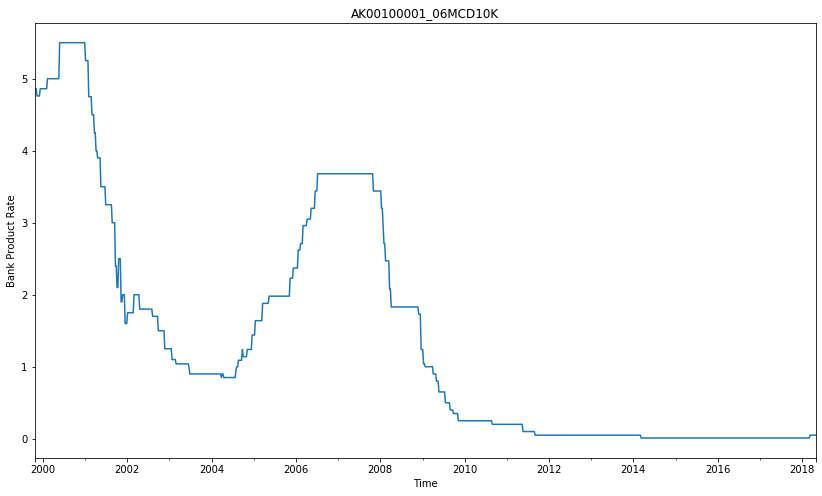

In [13]:
# DON'T WRITE HERE
title='AK00100001_06MCD10K'
ylabel='Bank Product Rate'
xlabel='Time' # we don't really need a label here

ax = df['rate'].plot(figsize=(14,8),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 2. Run an ETS Decomposition
Use an 'additive' model.

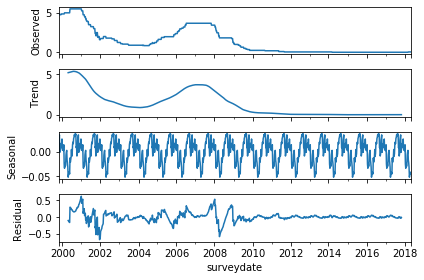

In [14]:
# DON'T WRITE HERE
results = seasonal_decompose(df['rate'], model='add')
results.plot();

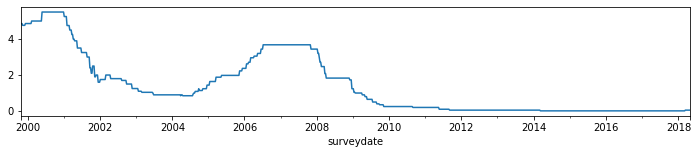

In [387]:
results.observed.plot(figsize=(12,2))

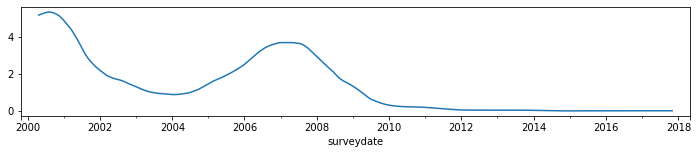

In [388]:
results.trend.plot(figsize=(12,2))

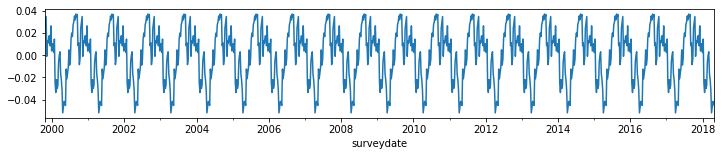

In [389]:
results.seasonal.plot(figsize=(12,2))

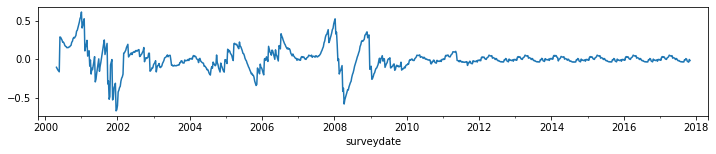

In [390]:
results.resid.plot(figsize=(12,2))

### 3. Split the data into train/test sets
Set one year (52 records) for testing.

In [391]:
# DON'T WRITE HERE
train = df.iloc[:len(df)-52]
test = df.iloc[len(df)-52:]

In [392]:
train.shape

(915, 1)


# 4. Run pmdarima.auto_arima to obtain recommended orders


In [393]:
auto_arima(df['rate'],seasonal=True,m=52).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  967
Model:               SARIMAX(2, 1, 1)   Log Likelihood                1310.568
Date:                Sun, 18 Aug 2019   AIC                          -2611.136
Time:                        16:45:38   BIC                          -2586.770
Sample:                             0   HQIC                         -2601.860
                                - 967                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.135e-05      0.000     -0.159      0.874      -0.001       0.000
ar.L1          0.8541      0.056     15.252      0.000       0.744       0.964
ar.L2          0.1064      0.047      2.255      0.024       0.014       0.199
ma.L1         -0.9017      0.019    -46.443      0.000      -0.940      -0.864
sigma2         0.0038   4.93e-05     78.097      0.000       0.004       0.004
===================================================================================
Ljung-Box (Q):                      104.96   Jarque-Bera (JB):             49442.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -2.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 5. Fit a SARIMA(2, 1, 1) model to the training set

In [394]:
# DON'T WRITE HERE
model = SARIMAX(df['rate'],order=(2,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   rate   No. Observations:                  967
Model:               SARIMAX(2, 1, 1)   Log Likelihood                1310.796
Date:                Sun, 18 Aug 2019   AIC                          -2613.592
Time:                        16:46:35   BIC                          -2594.100
Sample:                    10-27-1999   HQIC                         -2606.171
                         - 05-02-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8730      0.054     16.177      0.000       0.767       0.979
ar.L2          0.0998      0.047      2.110      0.035       0.007       0.193
ma.L1         -0.9154      0.016    -57.476      0.000      -0.947      -0.884
sigma2         0.0039   4.84e-05     80.074      0.000       0.004       0.004
===================================================================================
Ljung-Box (Q):                      103.33   Jarque-Bera (JB):             48030.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [406]:
# DON'T WRITE HERE
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,1) Predictions')

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

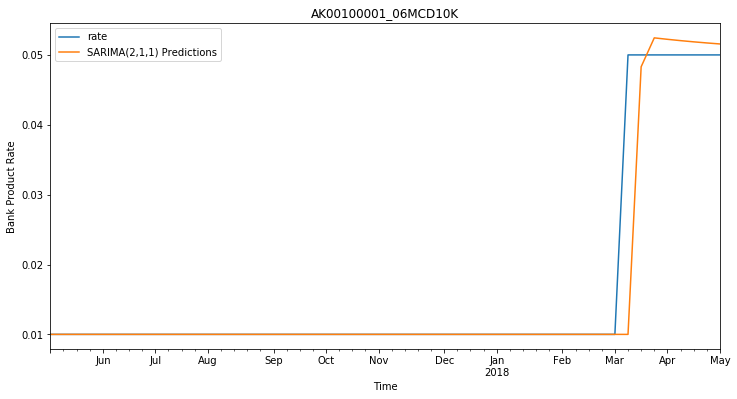

In [407]:
# DON'T WRITE HERE
title='AK00100001_06MCD10K'
ylabel='Bank Product Rate'
xlabel='Time'

ax = test['rate'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [399]:
# DON'T WRITE HERE
error1 = mean_squared_error(test['rate'], predictions)
error2 = rmse(test['rate'], predictions)
print(f'SARIMA(2,1,1) MSE Error: {error1:11.10}')
print(f'SARIMA(2,1,1) RMSE Error: {error2:11.10}')

SARIMA(2,1,1) MSE Error: 3.128667924e-05
SARIMA(2,1,1) RMSE Error: 0.005593449673


In [401]:
print('test rate mean is:',test['rate'].mean())
print('predictions rate mean is:',predictions.mean())

test rate mean is: 0.016153846153846164
predictions rate mean is: 0.015580325355604892


### 9. Retrain the model on the full data and forecast one year into the future

In [403]:
# DON'T WRITE HERE
model = SARIMAX(df['rate'],order=(2,1,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+51,typ='levels').rename('SARIMA(2,1,1) Forecast')

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

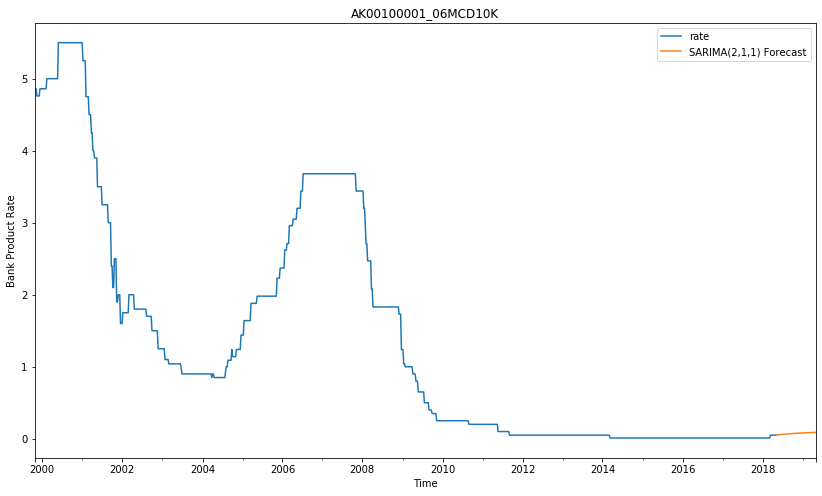

In [405]:
title='AK00100001_06MCD10K'
ylabel='Bank Product Rate'
xlabel='Time'

ax = df['rate'].plot(legend=True,figsize=(14,8),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Comments: